# Анализ выполнен на основе набора данных «Титаник»..

### Загрузим Titanic Dataset

In [ ]:
from scipy.stats import probplot,chi2_contingency

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

#path = 'P2NumPy_Pandas/Project/'
titanic_df = pd.read_csv('https://raw.githubusercontent.com/naveenpitchai/statistical-analysis-titanic-dataset/refs/heads/master/titanic-data.csv')

- Столбцы, содержащие отсутствующие атрибуты: Возраст, Каюта, Порт

- Количество пропущенных значений для каждого столбца

- Возраст: 177 значений

- Каюта: 687 значений

- порт: 2 значения

Столбцы с пропущенными значениями не использовались ни для каких статистических тестов или визуализаций, поэтому мы решили проигнорировать пропущенные значения.

В случае, если в будущем мне придется заполнять недостающие значения, для расчетов будут использоваться приведенные ниже данные.

In [ ]:
#обработка отсутствующего возраста путем удаления записей, в которых не указан  возраст

titanic_df_modified = titanic_df.loc[titanic_df['Age'].isnull() == False]

#Оставим порт и каюту без изменения не будем использовать эти столбцы

shape = titanic_df_modified.shape

print('Dataframe Rows:{} - Columns:{}'.format(shape[0],shape[1]) )

titanic_df_modified.head(5) #исходный набор состоит из 714 строк

Dataframe Rows:714 - Columns:12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Набор данных имеет очень ограниченное количество столбцов, и многие из них не содержат значимой информации.
- Отсутствующие значения. Отсутствует почти вся информация о каюте и большая часть информации о возрасте.
- Невозможно оценить аналогичное количество населения в случае подобных бедствий.
- Поскольку набор данных собран среди выживших и большего количества людей из первого класса, он не дает четкой картины ограничений и неудач в процессе эвакуации. Поэтому данные частично подвержены влиянию «ошибки выживших».
Отсутствие данных о выживании экипажа также усиливает вышеуказанное ограничение.

Наличие информации о способах эвакуации, например, номер спасательной шлюпки, использованной для эвакуации, указание состава экипажа и причины смерти, помогло бы лучше проанализировать серьезность ситуации.



--------
Вопрос № 1. Оказывал ли класс пассажиров какое-либо влияние на уровень выживаемости?

Проверка гипотез

Тип теста: критерий независимости хи-квадрат (для категориальной переменной)

Нулевая гипотеза: Уровень выживания не зависит от класса пассажира.

Альтернативная гипотеза: вероятность выживания зависит от класса пассажира.

Уровень значимости (α) = 0,05

СтепениСвободы = 2

хикритический = 5,99 (для значимости 0,05)

In [ ]:
# Подготовка данных для проведения теста хи-квадрат.Расчет руками

groupby_class = titanic_df_modified.groupby('Survived')['Pclass'].value_counts() #отображение количества классов для выживших и не выживших
groupby_class

Survived  Pclass
0         3         270
          2          90
          1          64
1         1         122
          3          85
          2          83
Name: count, dtype: int64

In [ ]:
#Исходный датафрейм

contigency_df=pd.crosstab(columns=titanic_df_modified['Pclass'],
            index=titanic_df_modified['Survived'],
            margins=True)
print(contigency_df)


Pclass      1    2    3  All
Survived                    
0          64   90  270  424
1         122   83   85  290
All       186  173  355  714


In [ ]:
Ho = "Вероятность выжить или погибнуть не зависила класса в котором ехал пассажир"   # Stating the Null Hypothesis
Ha = "Вероятность выжить или погибнуть зависила от  класса в котором ехал пассажир"

In [ ]:
chi, p_value, dof, expected =  chi2_contingency(contigency_df)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Вероятность выжить или погибнуть зависила от  класса в котором ехал пассажир as the p_value (0.0) < 0.05


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.11/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['shape']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


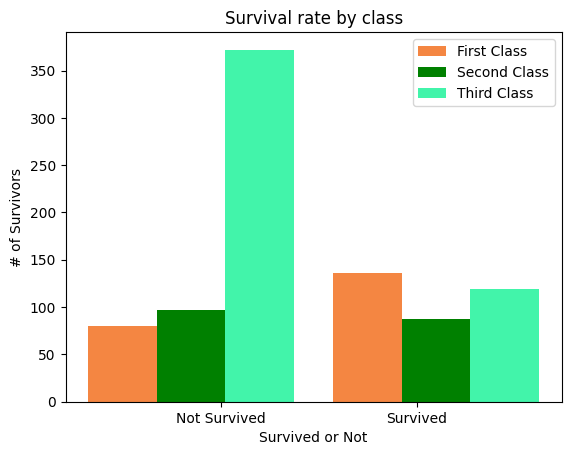

In [ ]:
%pylab inline

#Did class have an effect on Survival rate.?

#splitting the data frame based on the class
first_df = titanic_df.loc[titanic_df.Pclass == 1]
second_df = titanic_df.loc[titanic_df.Pclass == 2]
third_df = titanic_df.loc[titanic_df.Pclass == 3]

group_by_first = first_df.groupby('Survived', as_index = False).count()
group_by_second = second_df.groupby('Survived',as_index = False).count()
group_by_third = third_df.groupby('Survived',as_index = False).count()

bar_width = 0.35

plt.bar([0.5, 1.75],group_by_first['PassengerId'],bar_width, color = '#f48642',label = 'First Class' )

plt.bar([0.5 + bar_width, 1.75 + bar_width], group_by_second['PassengerId'], bar_width, color = 'green',
        label = 'Second Class')
#plt.xticks(group_by_first['Survived']  + 0.5, labels, legend = 'Second Class')

plt.bar([0.85 + bar_width, 1.75 + 2* bar_width], group_by_third['PassengerId'], bar_width, color = '#42f4aa',
       label = 'Third Class')
#plt.xticks(group_by_first['Survived']  + 0.5, labels)

labels_s = ['Not Survived', 'Survived']

plt.xticks(group_by_first['Survived'] + 1, labels_s)

plt.xlabel('Survived or Not')
plt.ylabel('# of Survivors')
plt.title("Survival rate by class")
plt.legend()
plt.show()


## Заключение:
На основании проведенного теста и визуализации мы можем сделать вывод, что класс пассажира влияет на то, выживет ли пассажир или нет, из-за крайне низкой вероятности для такого большого значения хи-квадрат.

Следовательно, мы отвергаем нулевую гипотезу.
Наблюдаемая зависимость может быть вызвана следующими причинами:

Просто для богатых на корабле было предоставлено больше спасательных шлюпок.
Вполне возможно, что у богатых были преданные сопровождающие, которые могли помочь им добраться до безопасного места.
Пассажиры первого класса могли дать взятку, чтобы попасть в спасательные шлюпки.

------

Вопрос № 2: Оказывал ли пол какое-либо влияние на выживание пассажира?
Проверка гипотез
Тип теста: критерий независимости хи-квадрат (для категориальной переменной)

Нулевая гипотеза: Уровень выживаемости не зависит от пола пассажира.
Альтернативная гипотеза: уровень выживаемости зависит от пола пассажира.
Уровень значимости (α) = 0,05
СтепениСвободы = 1
хикритический = 3,841 (для значимости 0,05)

In [ ]:
Ho = "Вероятность выжить или погибнуть не зависила от пола  пассажира"   # Stating the Null Hypothesis
Ha = "Вероятность выжить или погибнуть зависила от пола пассажира"

In [ ]:


groupedby_genderval = titanic_df.groupby('Survived')['Sex'].value_counts()

pivot_cont = pd.pivot_table(titanic_df[['Survived', 'Sex']], index = ['Survived'],columns = 'Sex', aggfunc = len)

print ('Contigency table: \n{}\n'.format(pivot_cont))

pivot_cont_class = pd.pivot_table(titanic_df[['Survived', 'Pclass']], index = ['Survived'],columns = 'Pclass', aggfunc = len)




Contigency table: 
Sex       female  male
Survived              
0             81   468
1            233   109



In [ ]:
chi, p_value, dof, expected =  chi2_contingency(pivot_cont)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Вероятность выжить или погибнуть зависила от пола пассажира as the p_value (0.0) < 0.05


Populating the interactive namespace from numpy and matplotlib


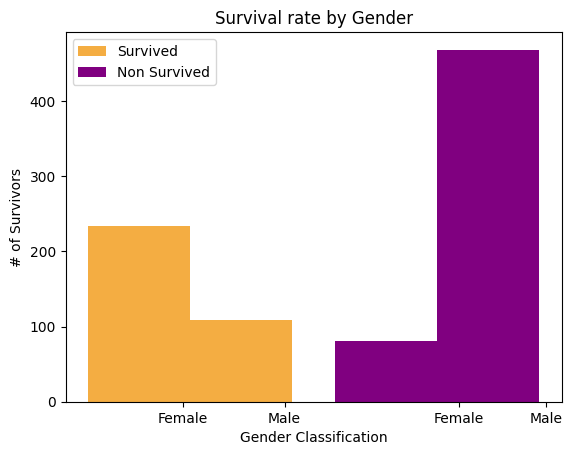

In [ ]:
#Data visualization for effect of Sex on Survival rate:

survived_df = titanic_df.loc[titanic_df['Survived'] == 1]
not_survived_df = titanic_df.loc[titanic_df['Survived'] == 0]

gender_survival = survived_df.groupby('Sex', as_index = False).count()
gender_nsurvival = not_survived_df.groupby('Sex', as_index = False).count()

%pylab inline

labels = ['Female', 'Male', 'Female', 'Male']
label_y = ['Survived', 'Non Survived']

plt.bar([0.7, 1.05], gender_survival['Survived'],
        bar_width, color = '#f4ad42' , label = 'Survived')

plt.bar([0.85 + 2*bar_width, 0.85 + 3*bar_width],
        gender_nsurvival['Survived'], bar_width, color = 'purple',label = 'Non Survived')

plt.xticks([0.85,1.2,1.8,2.1], labels)
plt.legend(loc = 'upper left')
plt.xlabel('Gender Classification')
plt.ylabel('# of Survivors')
plt.title('Survival rate by Gender')
plt.show()

Заключение: На основании теста на независимость и визуализации данных мы можем увидеть значительное влияние пола на уровень выживаемости.

Вопрос № 3: Повлияло ли возраст на выживаемость?

In [ ]:
def agegroup(x):
    '''
    I determine the appropriate age group for a particular passenger
    '''
    if np.isnan(x):
        return (np.nan)
    elif x<18:
        return("Child")
    else:
        return("Adult")

titanic_df_modified .loc[:,'AgeGroup']=titanic_df_modified['Age'].apply(agegroup)
titanic_df_modified['AgeGroup'].value_counts()

/tmp/ipython-input-55-138005932.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df_modified .loc[:,'AgeGroup']=titanic_df_modified['Age'].apply(agegroup)


,count
AgeGroup,
Adult,601
Child,113


In [ ]:
def agegroup(x):
    '''
    I determine the appropriate age group for a particular passenger
    '''
    if np.isnan(x):
        return (np.nan)
    elif x<18:
        return("Child")
    else:
        return("Adult")

titanic_df_modified .loc[:,'AgeGroup']=titanic_df_modified['Age'].apply(agegroup)
titanic_df_modified['AgeGroup'].value_counts()

,count
AgeGroup,
Adult,601
Child,113


In [ ]:
lived=pd.crosstab(index=titanic_df_modified['AgeGroup'],
            columns=titanic_df_modified['Survived'])
lived

Survived,0,1
AgeGroup,,
Adult,372,229
Child,52,61


-------
Вопрос № 4: Повлияло ли наличие брата или сестры на выживаемость?


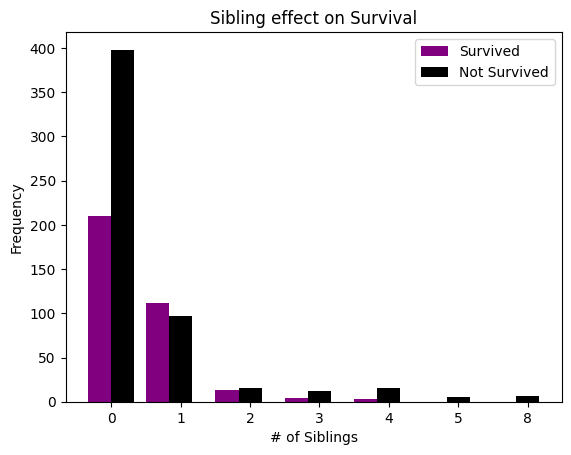

In [ ]:
siblings_group_surv = survived_df.groupby('SibSp', as_index = False).count()
siblings_group_nsurv = not_survived_df.groupby('SibSp', as_index = False).count()

bar_width1 = 1

xcord1 = [0.5,3*bar_width1,6*bar_width1,9*bar_width1,
          12*bar_width1]

labels1 = ['Survived', 'Non Survived']

xcord2 = [0.5 + bar_width1,4*bar_width1,7*bar_width1,
         10*bar_width1,13*bar_width1,
         16*bar_width1, 19*bar_width1]

plt.bar(xcord1, siblings_group_surv['Survived'], bar_width1,
        color = 'purple' , label = 'Survived')

plt.bar(xcord2, siblings_group_nsurv['Survived'], bar_width1,
        color = 'black', label = 'Not Survived')

plt.xticks([1,4,7,10,13,16,19],[0,1,2,3,4,5,8])

plt.xlabel('# of Siblings')
plt.ylabel('Frequency')
plt.title('Sibling effect on Survival')

plt.legend()

## Заключение:
Из графика выше следует, что пассажиры, у которых есть один брат или сестра, чувствовали себя лучше, чем другие пассажиры.
----------
Вопрос № 4 — Как распределились переменные возраста и стоимости проезда?

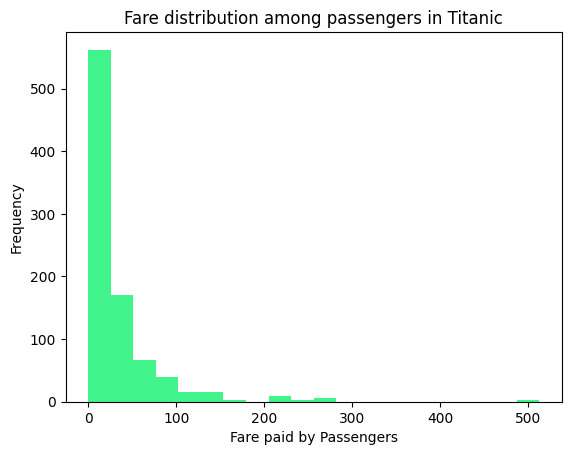

In [ ]:
import seaborn as sns

plt.hist(titanic_df['Fare'], bins = 20, color = '#42f48c')

plt.xlabel('Fare paid by Passengers')
plt.ylabel('Frequency')
plt.title('Fare distribution among passengers in Titanic')

plt.show()

Распределение имеет положительную асимметрию и имеет некоторые выбросы. Это более подробно проанализировано в вопросе № 5

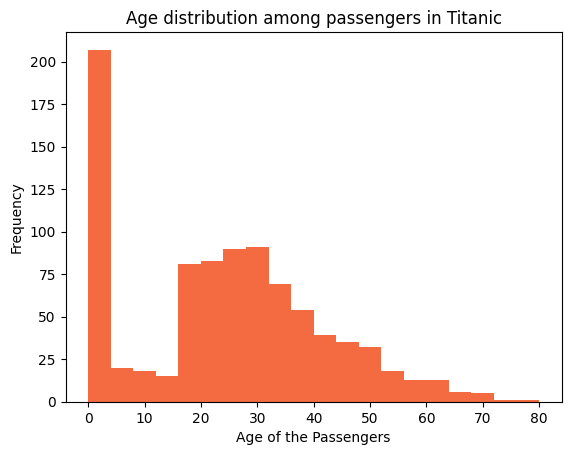

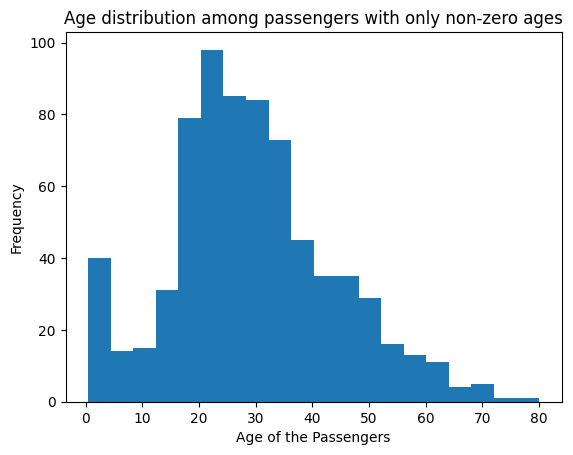

In [ ]:
titanic_df_ageaszero = titanic_df

titanic_df_ageaszero['Age'] = titanic_df['Age'].fillna(0)

plt.hist(titanic_df_ageaszero['Age'], bins = 20, color = '#f46b42')

plt.xlabel('Age of the Passengers')
plt.ylabel('Frequency')
plt.title('Age distribution among passengers in Titanic')

plt.show()

age_nonzero = titanic_df.loc[titanic_df.Age != 0]

plt.hist(titanic_df_modified['Age'] , bins = 20)

plt.xlabel('Age of the Passengers')
plt.ylabel('Frequency')
plt.title('Age distribution among passengers with only non-zero ages')

plt.show()

##### Распределение возраста почти нормальное со значимыми значениями ниже 5, поскольку около 177 значений были пропущены и на их месте был добавлен 0.

Отбрасывание ненулевых значений дало несколько более нормальное распределение.

Вопрос № 5 - Как распределялась стоимость проезда по классу и станции посадки? Были ли какие-либо отклонения?

In [ ]:
import seaborn as sns

sns.boxplot(x=titanic_df['Pclass'], y = titanic_df['Fare'], palette = 'Set2',linewidth = '1.5')

sns.plt.title('(Fig.1) Analysis of distribution, outliers for fare of passenger class')

sns.plt.show()

sns.boxplot(x = titanic_df['Embarked'], y = titanic_df['Fare'])

sns.plt.title('(Fig.2) Analysis of distribution, outliers for fare of station embarked')
sns.plt.ylim(0,550)
sns.plt.show()

/tmp/ipython-input-61-2808350509.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=titanic_df['Pclass'], y = titanic_df['Fare'], palette = 'Set2',linewidth = '1.5')


AttributeError: module 'seaborn' has no attribute 'plt'

Error in callback <function _draw_all_if_interactive at 0x7eb6bef53d80> (for post_execute):


RuntimeError: Unable to cast Python instance of type <class 'tuple'> to C++ type '?' (#define PYBIND11_DETAILED_ERROR_MESSAGES or compile in debug mode for details)

RuntimeError: Unable to cast Python instance of type <class 'tuple'> to C++ type '?' (#define PYBIND11_DETAILED_ERROR_MESSAGES or compile in debug mode for details)

<Figure size 640x480 with 1 Axes>

Первый график (рис. 1) показывает класс пассажиров и распределение тарифов. Из графика видно, что в первом классе цены на билеты были разными и распределялись вокруг среднего значения. Также график показывает мало выбросов. Также изменчивость билетов для классов 2 и 3 была очень минимальной.

Второй график (рис. 2), по моему мнению, демонстрирует интересное явление. Пассажиры из Шербура заплатили значительно различающиеся суммы за проезд, и, что самое важное, большая группа этих тарифов распределена выше медианы и третьего квартиля. Он также имел довольно много выбросов. Основываясь на следующих выводах,

Большая часть данных распределена от медианы до третьего квартиля.
Он также имеет более длинный третий квартиль до максимума и более высокое максимальное значение, чем остальные.
В нем больше выбросов, чем в остальных.
мы можем предсказать некоторые демографические данные на основе этого, например, что в Шербуре демографический состав может быть средним или высшим.

Хотя выводы из этого ограниченного набора данных и визуализации не следует использовать в качестве индикатора для каких-либо исследований или публикаций.

Визуализация данных между переменными «Возраст» и «Тариф»

### Data visualization between Age and Fare variables

In [ ]:
pointerscales = (titanic_df['Fare'] - titanic_df['Fare'].mean())/titanic_df['Fare'].std()

colors = np.random.rand(891, 3)

plt.scatter(titanic_df['Age'], titanic_df['Fare'], s = pointerscales * 50, c = colors)

plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Plot based on the standardized value for Fare')

Окончательное заключение
Хотя ограниченность данных не позволила нам запустить Z-, T-тесты, хи-квадрат для категориальной переменной предоставил некоторые интересные и важные идеи,

Анализ №1:
Связь между классом (социально-экономическим статусом) и Выживанием была, по моему мнению, самой важной. Она была, до определенного уровня, согласована с моими ожиданиями, но сила этой связи удивила меня.

Однако это не подразумевает никакой причинно-следственной связи и не должно использоваться в качестве индикатора для принятия каких-либо будущих решений.

Анализ №2:
Следующая корреляция между полом и уровнем выживания очень хорошо совпала с моими ожиданиями, и это не было сюрпризом. Любая катастрофа должна включать в себя доставку детей и женщин в безопасное место, и это именно то, что произошло здесь.

Однако, опять же, это не подразумевает причинно-следственной связи.

Другой анализ и наблюдение
Судя по визуализации, пассажиры, у которых был один брат или сестра, чувствовали себя лучше.

Частота возраста была почти нормализована и указывает на то, что данные собраны вокруг среднего значения.

Пассажиры, вылетевшие из Шербура, заплатили за проезд дороже, чем остальные пассажиры пункта отправления, и у них также было немало отклонений.
Билеты первого класса имели большую вариативность в своем тарифе. Поэтому данные первого класса можно использовать для анализа того, как обстоят дела с выживаемостью в классе.

Хотя этот набор данных помог лучше понять катастрофу и предоставил некоторую ценную информацию, он не вносит большого вклада в предотвращение подобных катастроф в будущем из-за ограничений, упомянутых в начале проекта: в конце концов, мы не можем разместить всех людей в первом классе.

